# 📊 EDA: Customer Churn Prediction

Welcome to the Exploratory Data Analysis (EDA) notebook for the **Customer Churn** machine learning scenario.  
This notebook follows our 21-step structured EDA pipeline and uses the dataset: `EDA_CustomerChurn_Dataset.csv`.

---

**🎯 Objective:**  
Understand key patterns and behaviors that influence whether a customer will churn (`is_churned`).

---

💾 **Dataset Shape**: 10,000 records  
🔢 **Target Variable**: `is_churned`  
📁 **Domain**: Subscription services / SaaS / Telecom

Let's begin! 🚀


## 📥 Step 1: Load Dataset

In [1]:

import pandas as pd

# Load dataset
df = pd.read_csv("EDA_CustomerChurn_Dataset.csv")

# Convert dates
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'])

# Show first few rows
df.head()


,customer_id,signup_date,last_active_date,tenure_months,subscription_type,monthly_fee,auto_renew,payment_method,num_logins_last_30d,support_tickets,feature_usage_score,discount_used,referral_channel,country,is_churned
0,CUST00000,2019-01-01 00:00:00.000000000,2019-05-13 00:00:00.000000000,64,Basic,0,1,Wallet,11,2,26.61,1,Organic,France,0
1,CUST00001,2019-01-01 03:30:24.302430243,2020-04-10 03:30:24.302430243,64,Premium,30,0,PayPal,13,2,33.55,1,Referral,France,0
2,CUST00002,2019-01-01 07:00:48.604860486,2021-06-09 07:00:48.604860486,64,Premium,0,1,Wallet,18,5,17.55,0,Partner,Canada,0
3,CUST00003,2019-01-01 10:31:12.907290729,2019-10-28 10:31:12.907290729,64,Premium,30,1,Other,9,2,26.07,0,Organic,UK,0
4,CUST00004,2019-01-01 14:01:37.209720972,2019-05-17 14:01:37.209720972,64,Premium,10,1,Other,17,4,6.42,0,Partner,India,0


## 🧾 Step 2: Dataset Overview

In [2]:

print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Summary statistics
df.describe(include='all').T


Shape: (10000, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          10000 non-null  object        
 1   signup_date          10000 non-null  datetime64[ns]
 2   last_active_date     10000 non-null  datetime64[ns]
 3   tenure_months        10000 non-null  int64         
 4   subscription_type    10000 non-null  object        
 5   monthly_fee          10000 non-null  int64         
 6   auto_renew           10000 non-null  int64         
 7   payment_method       10000 non-null  object        
 8   num_logins_last_30d  10000 non-null  int64         
 9   support_tickets      10000 non-null  int64         
 10  feature_usage_score  10000 non-null  float64       
 11  discount_used        10000 non-null  int64         
 12  referral_channel     10000 non-null  object        
 13  countr

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
customer_id,10000,10000,CUST00000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signup_date,10000,NaN,NaN,NaN,2020-12-31 12:00:00,2019-01-01 00:00:00,2020-01-01 06:00:00,2020-12-31 12:00:00,2021-12-31 18:00:00,2023-01-01 00:00:00,NaN
last_active_date,10000,NaN,NaN,NaN,2022-04-10 01:23:13.920000,2019-02-12 13:01:59.891989198,2021-04-17 03:53:24.680468224,2022-04-12 02:13:17.119712,2023-04-07 19:19:42.718272,2025-06-02 00:59:37.317731760,NaN
tenure_months,10000.0,NaN,NaN,NaN,39.4832,15.0,27.0,39.0,52.0,64.0,14.065771
subscription_type,10000,3,Basic,4079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_fee,10000.0,NaN,NaN,NaN,16.378,0.0,10.0,10.0,30.0,30.0,11.973114
auto_renew,10000.0,NaN,NaN,NaN,0.6939,0.0,0.0,1.0,1.0,1.0,0.460895
payment_method,10000,4,PayPal,2511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_logins_last_30d,10000.0,NaN,NaN,NaN,12.03,2.0,10.0,12.0,14.0,27.0,3.481826
support_tickets,10000.0,NaN,NaN,NaN,1.4937,0.0,1.0,1.0,2.0,8.0,1.229517


## 📊 Step 3: Univariate Analysis

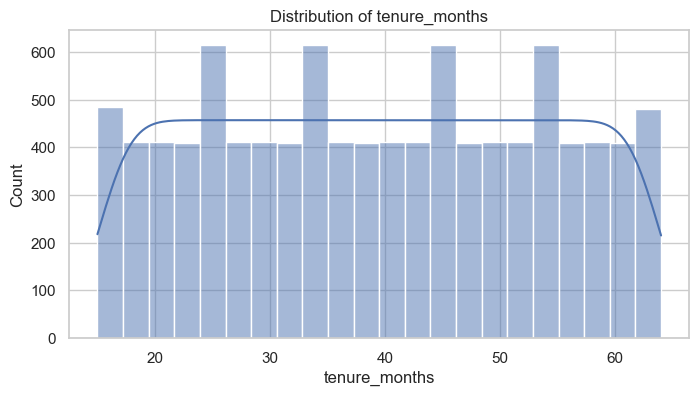

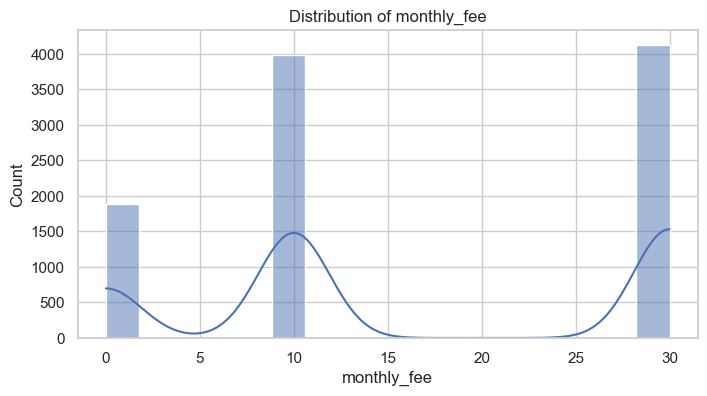

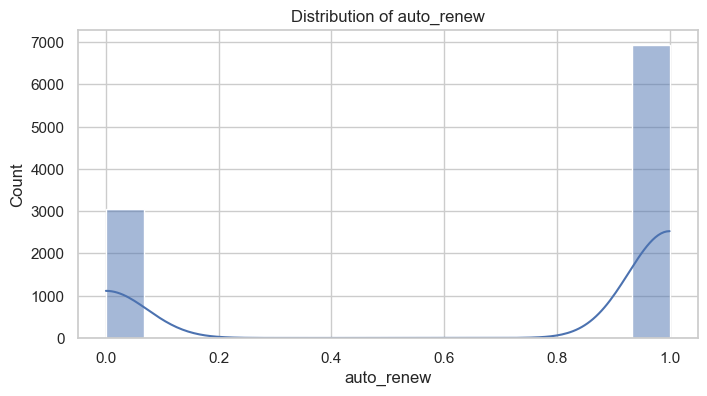

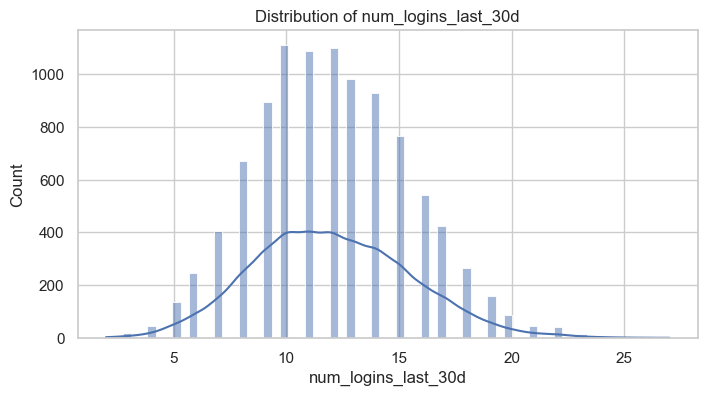

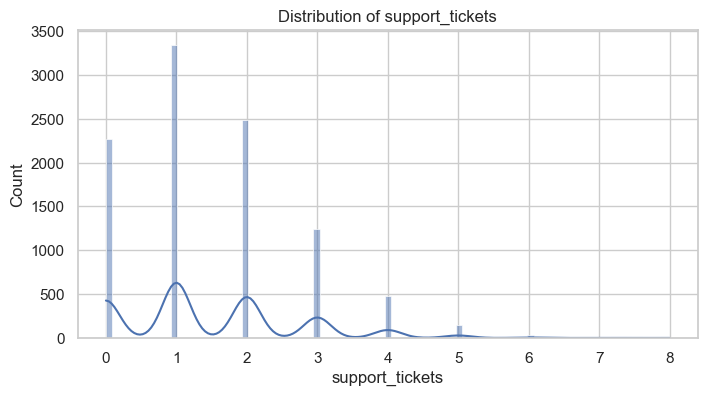

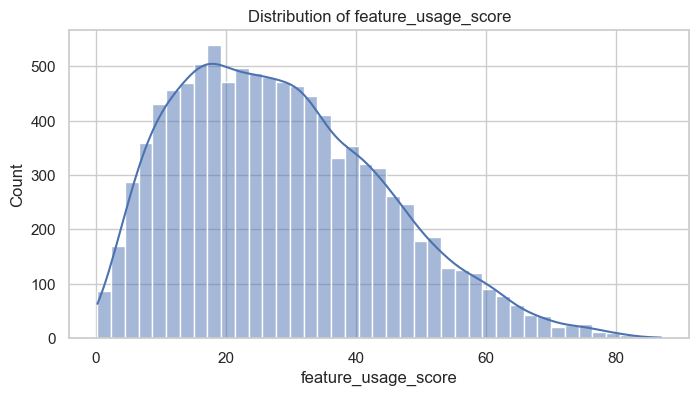

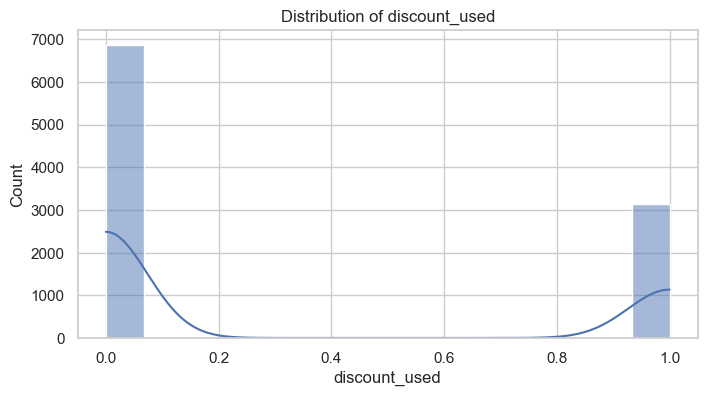

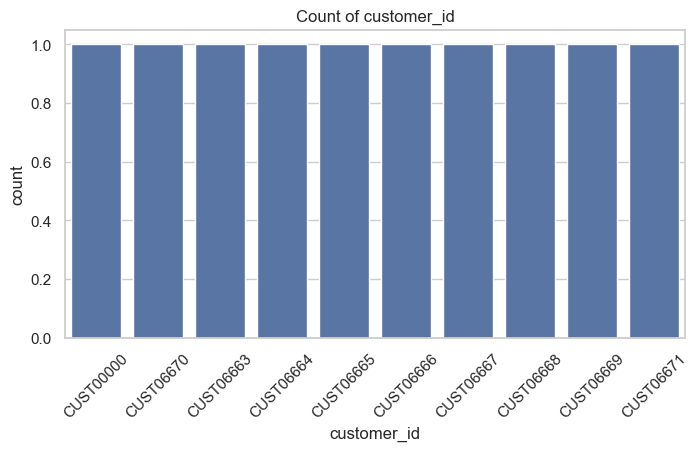

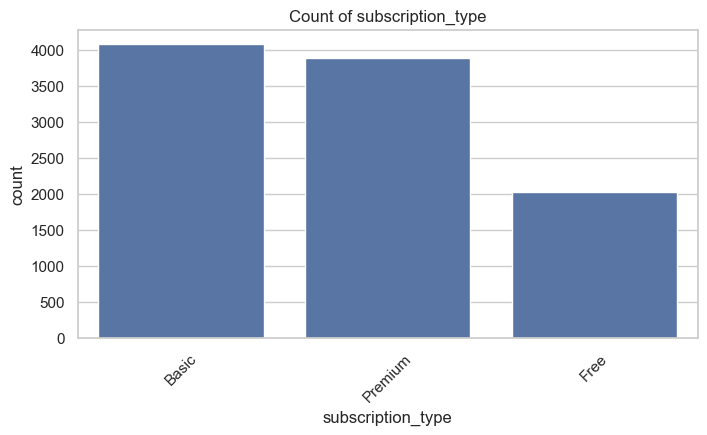

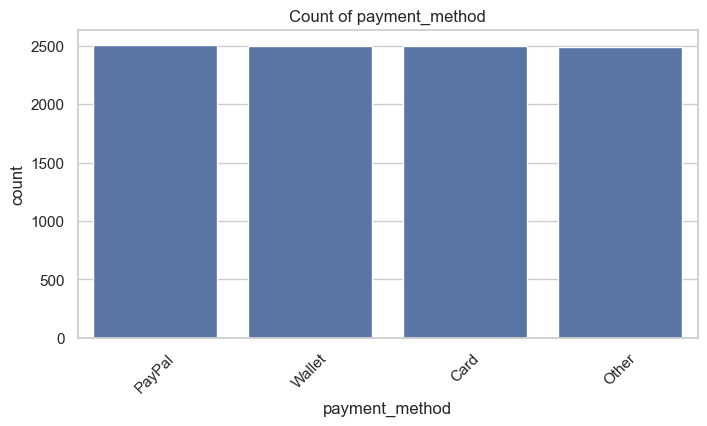

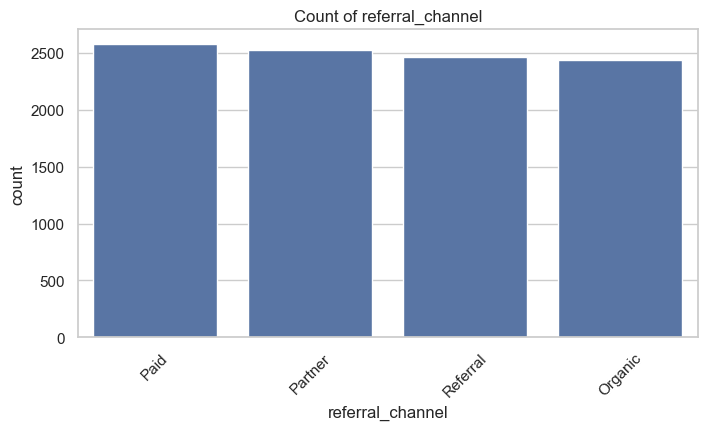

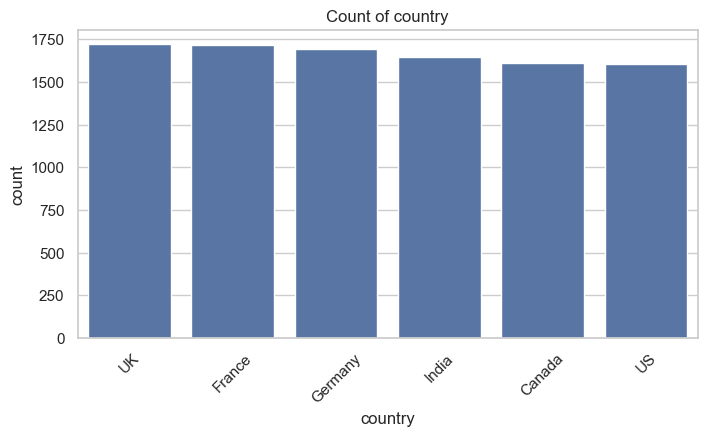

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('is_churned')
categorical_cols = df.select_dtypes(include='object').columns

# Numerical: Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical: Countplots
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 📉 Step 4: Bivariate Analysis

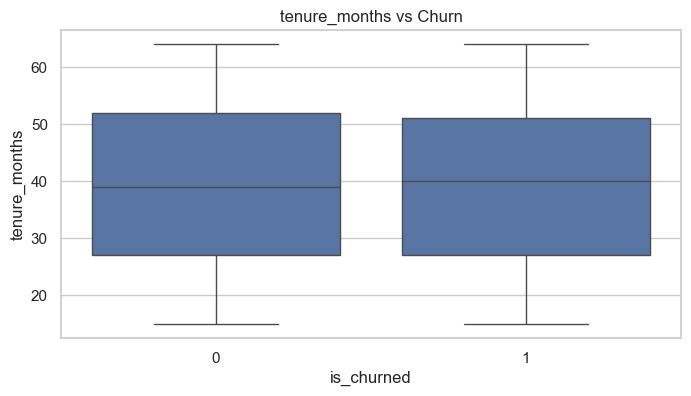

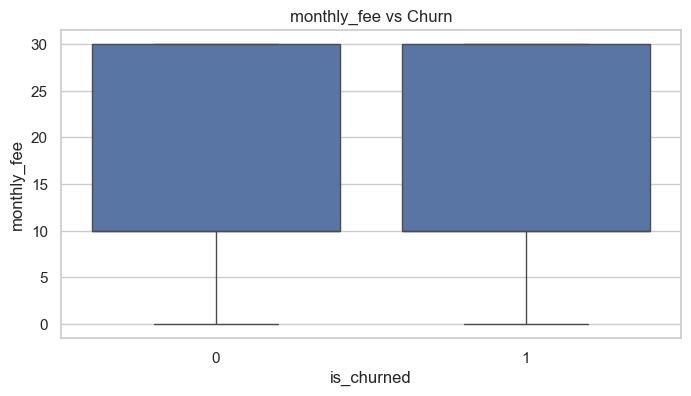

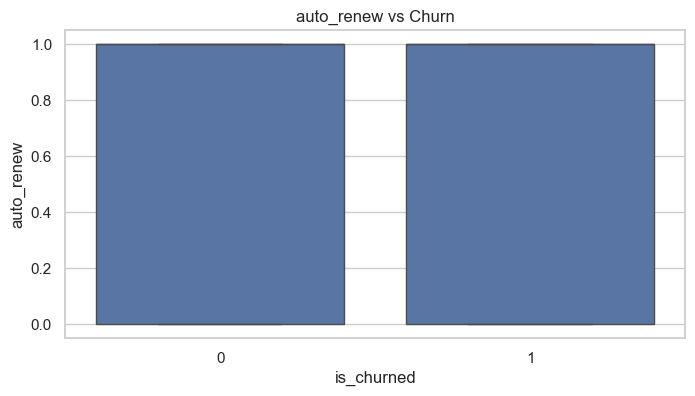

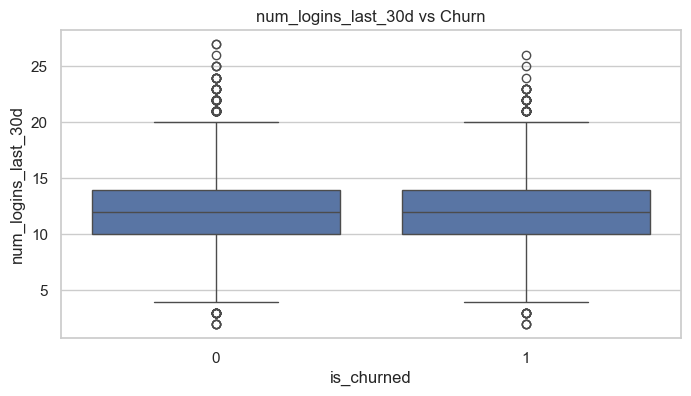

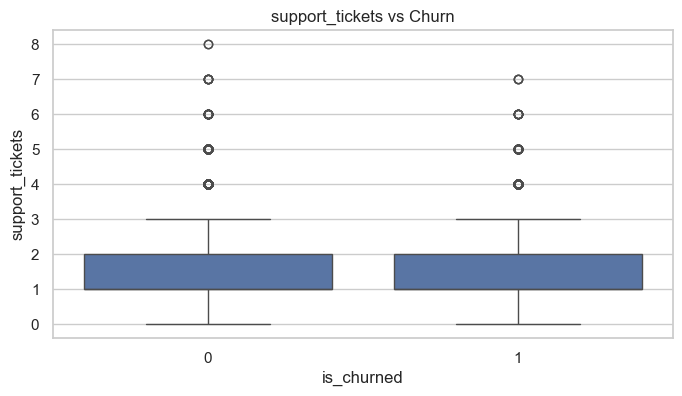

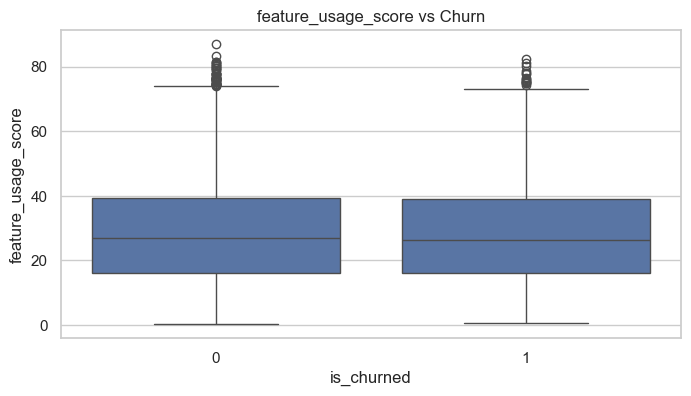

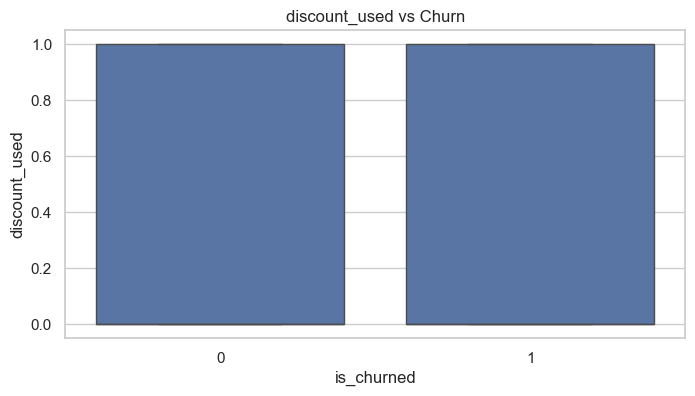

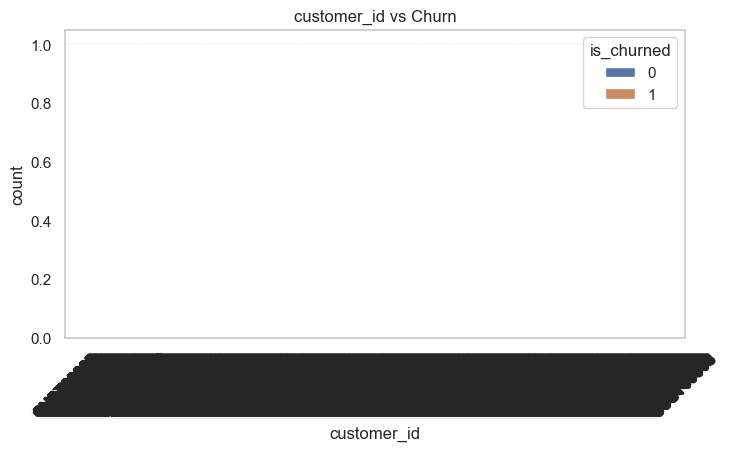

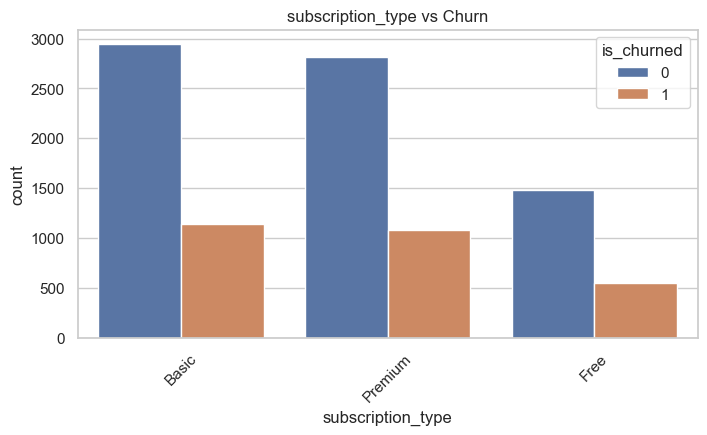

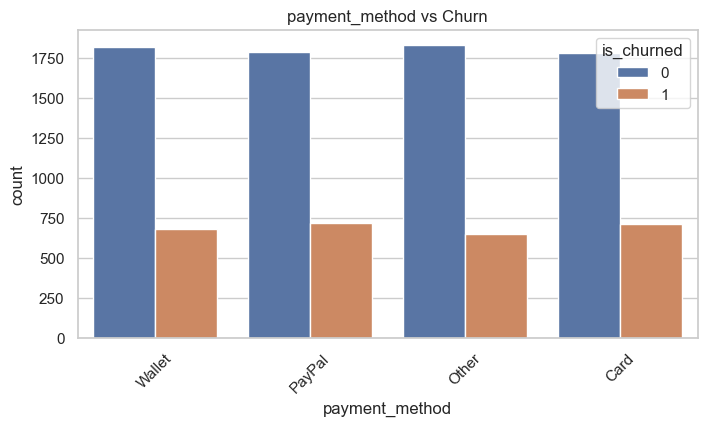

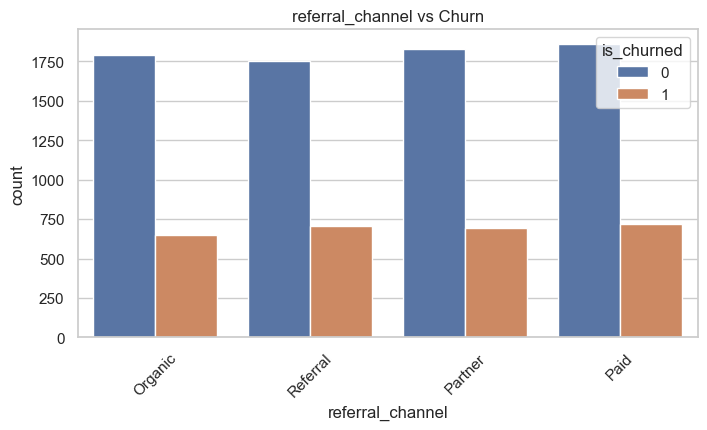

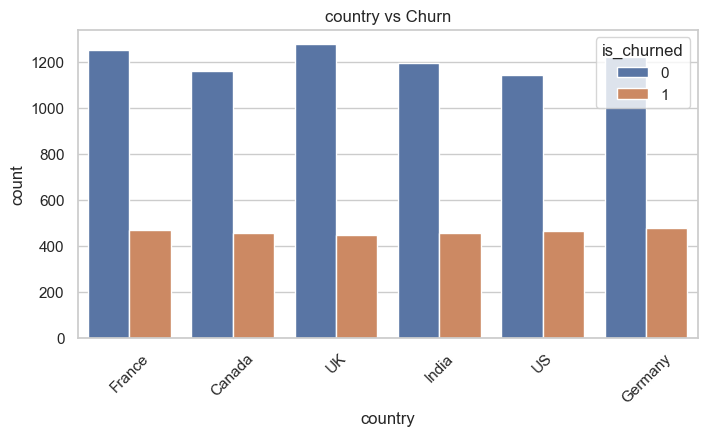

In [4]:

# Numerical vs Target
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='is_churned', y=col)
    plt.title(f'{col} vs Churn')
    plt.show()

# Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='is_churned')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


## 📊 Step 5: Multivariate Analysis

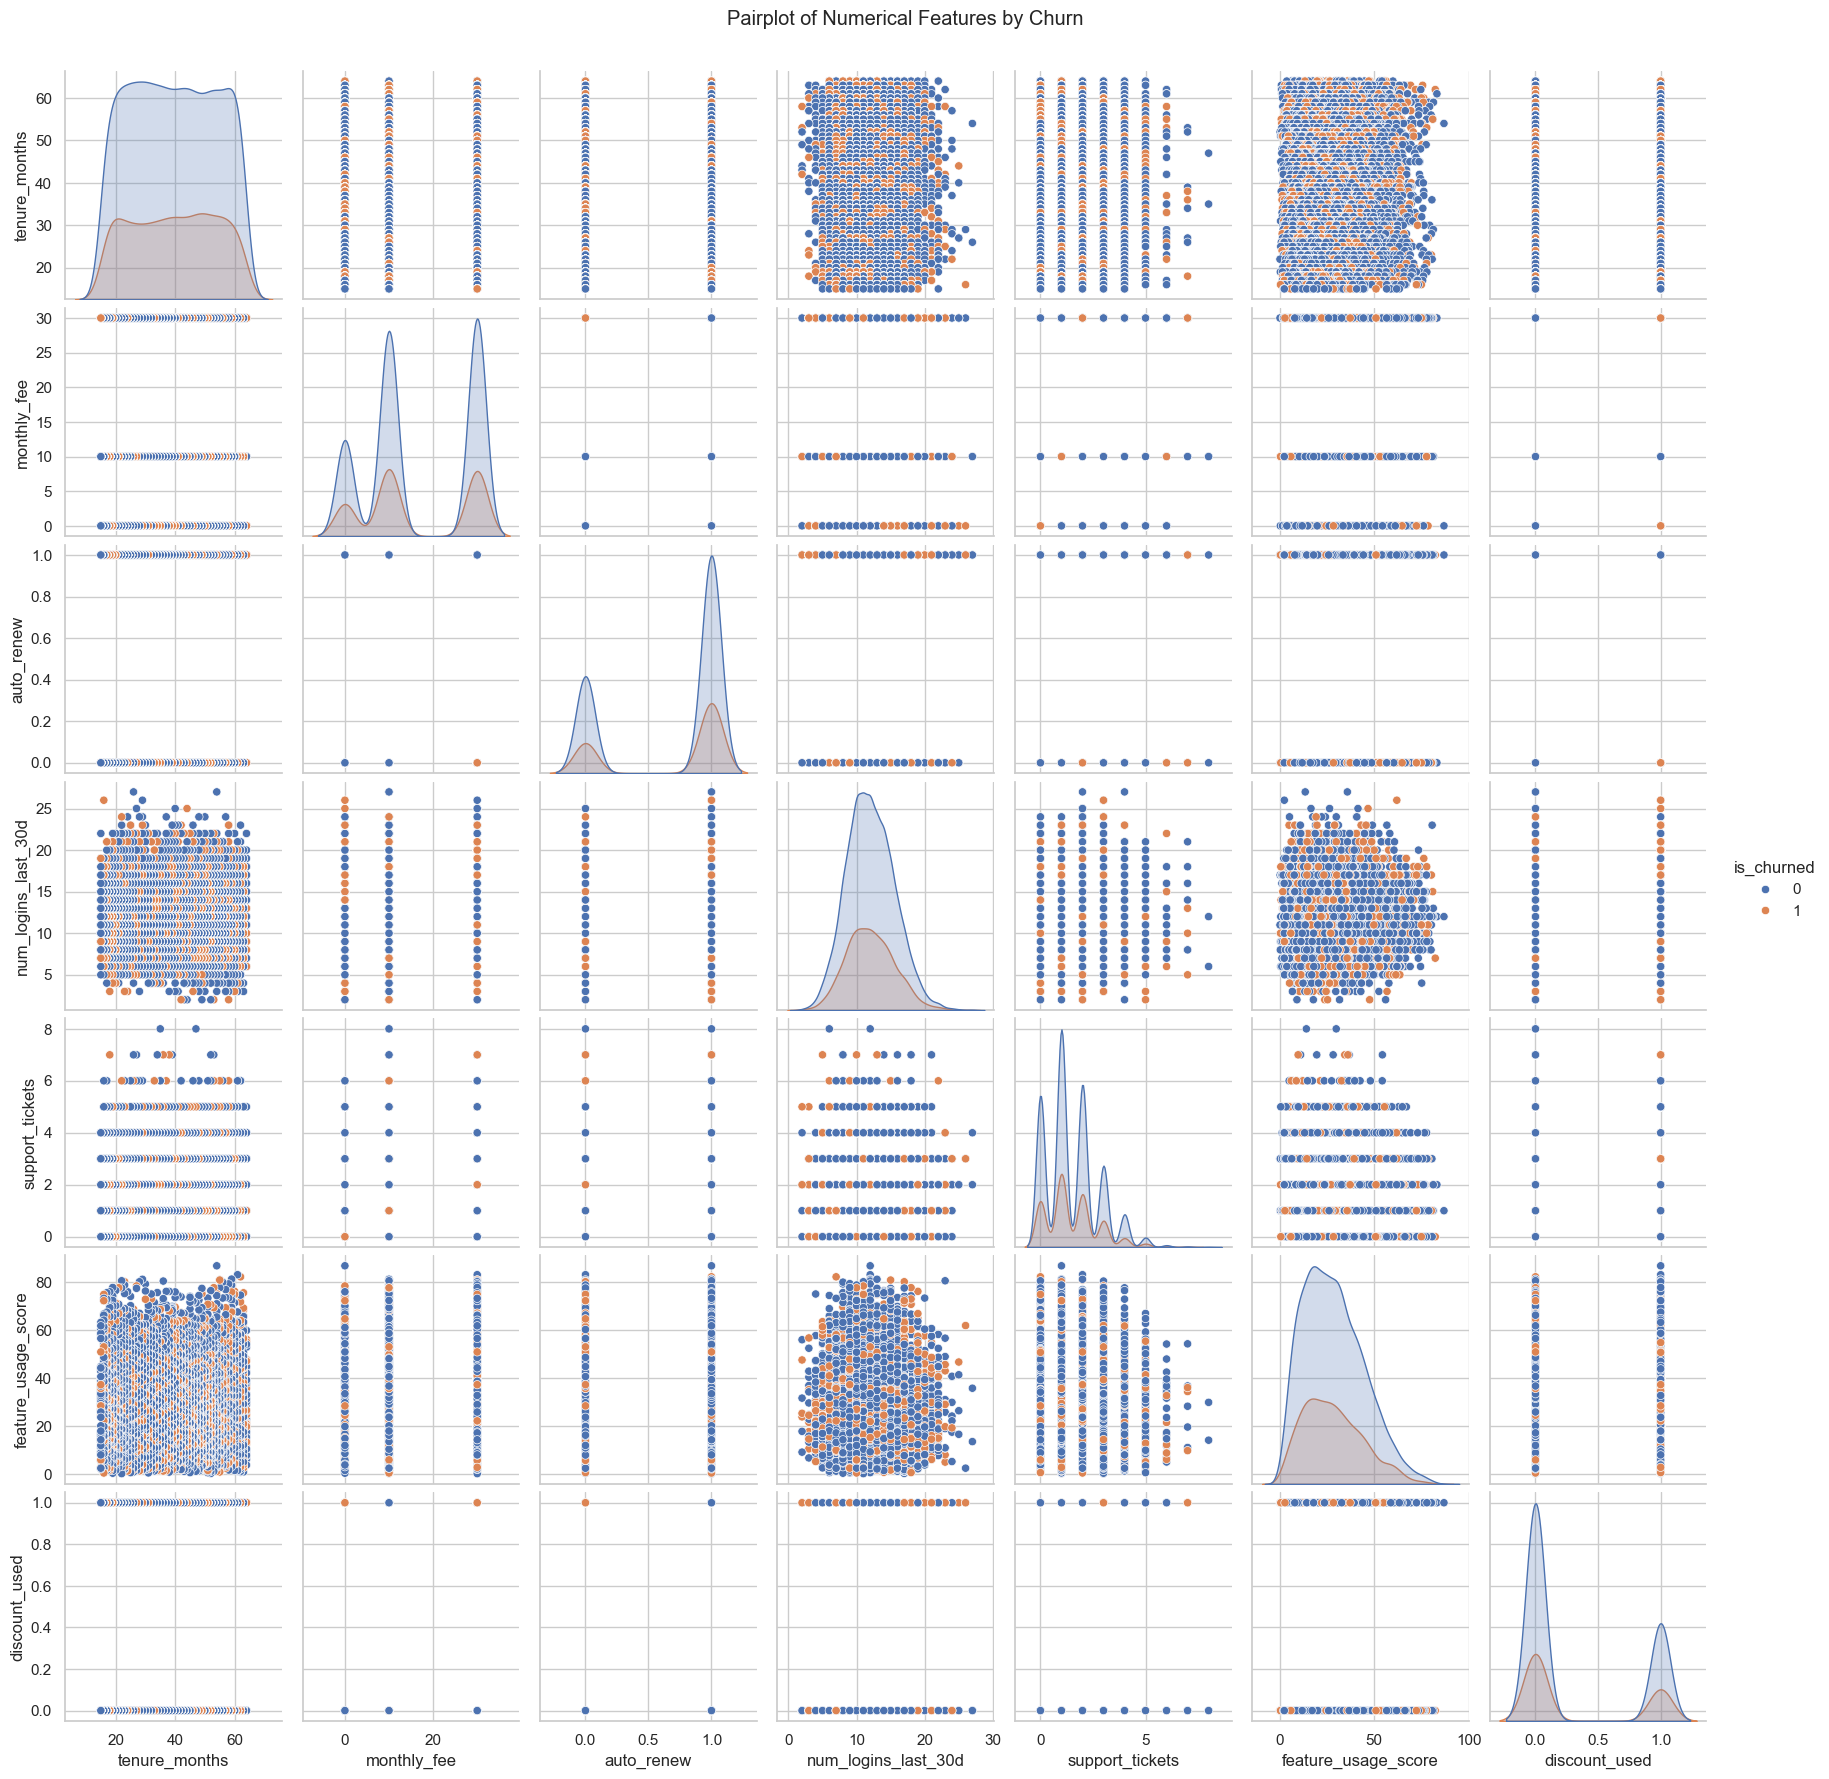

In [5]:

sns.pairplot(df[numerical_cols.tolist() + ['is_churned']], hue='is_churned')
plt.suptitle("Pairplot of Numerical Features by Churn", y=1.02)
plt.show()


## ❓ Step 6: Missing Value Analysis

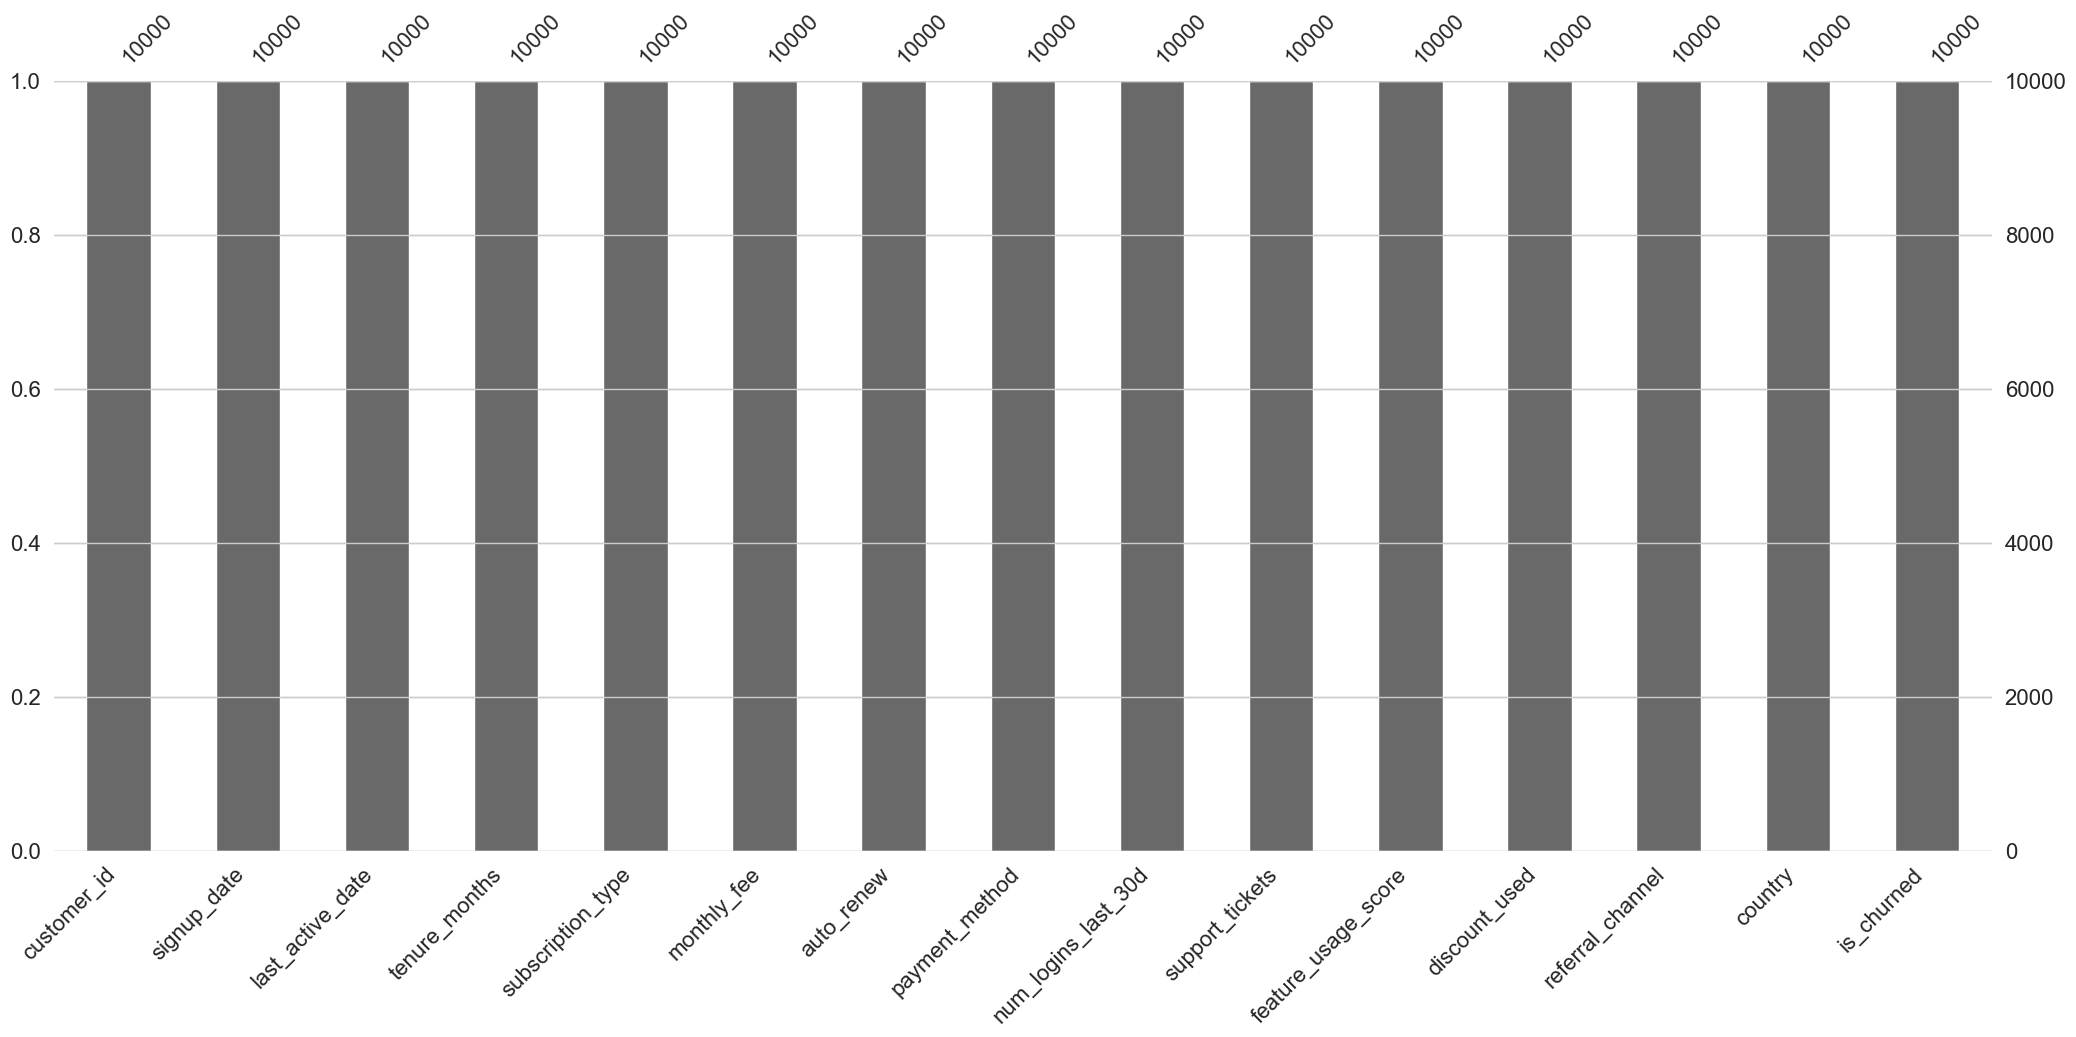

Series([], dtype: int64)

In [6]:

import missingno as msno
msno.bar(df)
plt.show()

missing = df.isnull().sum()
missing[missing > 0]


## 🚨 Step 7: Outlier Detection

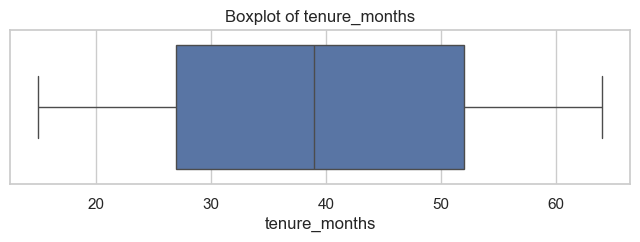

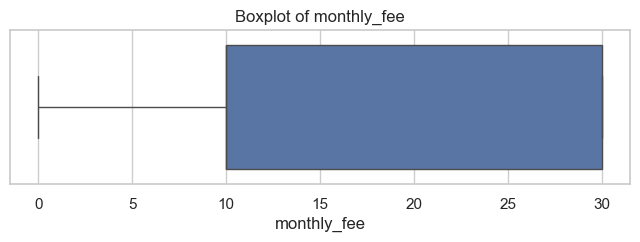

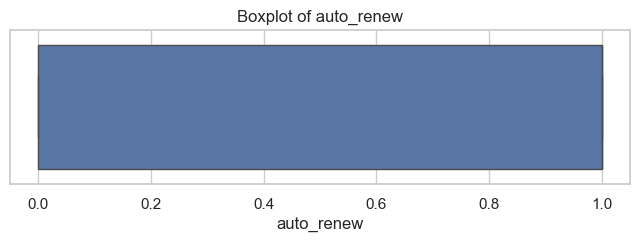

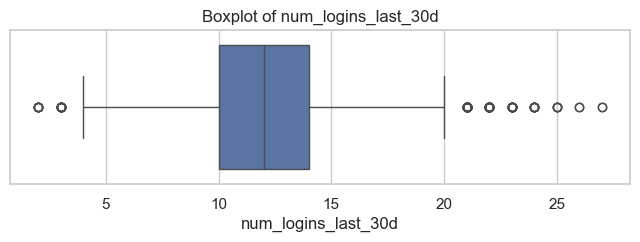

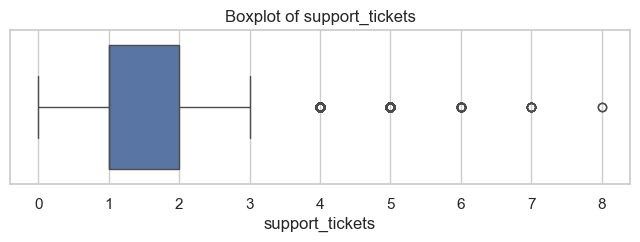

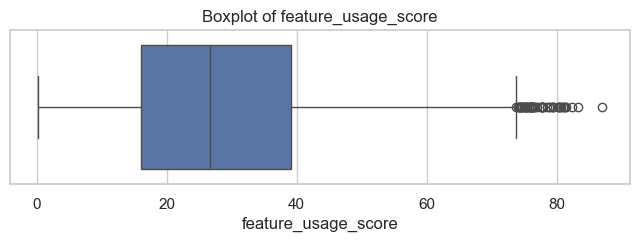

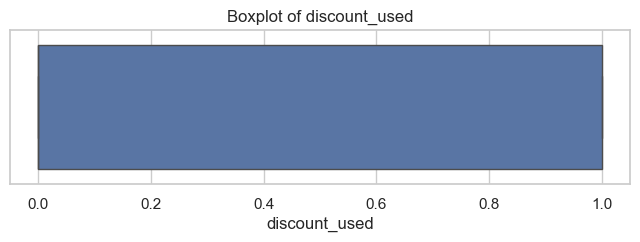

In [7]:

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 🔄 Step 8: Skewness & Transformation

In [8]:

from scipy.stats import skew
import numpy as np

skew_vals = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print(skew_vals)

# Apply log1p to skewed columns
for col in skew_vals[skew_vals > 1].index:
    df[f'{col}_log'] = np.log1p(df[col])


tenure_months         -0.000024
monthly_fee            0.066230
auto_renew            -0.841449
num_logins_last_30d    0.285393
support_tickets        0.822964
feature_usage_score    0.560717
discount_used          0.807033
dtype: float64


## 🎯 Step 9: Target Analysis

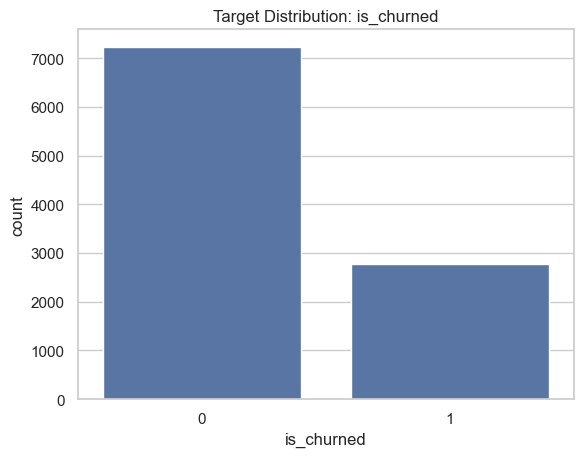

In [9]:

sns.countplot(x='is_churned', data=df)
plt.title('Target Distribution: is_churned')
plt.show()


## 🔗 Step 10: Correlation Analysis

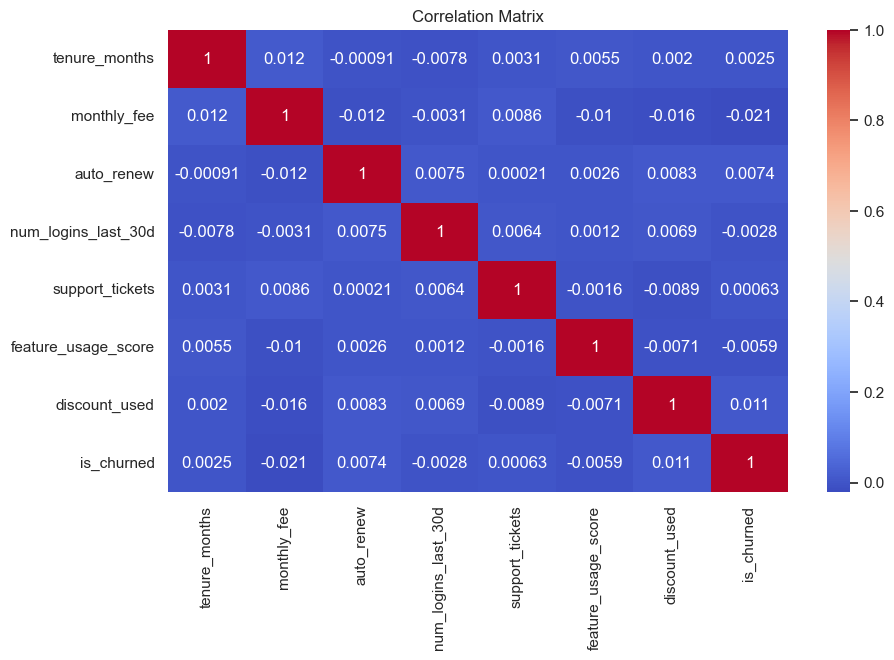

In [10]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## ⚖️ Step 11: Class Imbalance

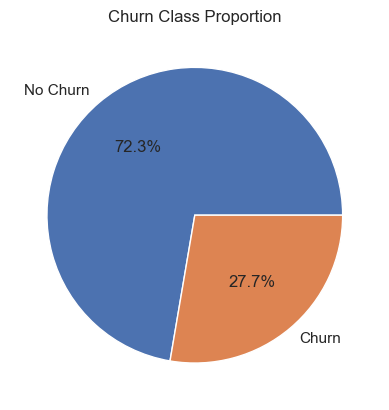

In [11]:

df['is_churned'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['No Churn', 'Churn'])
plt.title("Churn Class Proportion")
plt.ylabel("")
plt.show()


## 🔢 Step 12: Cardinality Check

In [12]:

df[categorical_cols].nunique().sort_values(ascending=False)


customer_id          10000
country                  6
payment_method           4
referral_channel         4
subscription_type        3
dtype: int64

## 🧼 Step 13: Data Quality Check

In [13]:

print("Duplicate Rows:", df.duplicated().sum())
zero_var = [col for col in df.columns if df[col].nunique() <= 1]
print("Zero-variance Columns:", zero_var)


Duplicate Rows: 0
Zero-variance Columns: []


## ⏱️ Step 14: Time Series Profiling

/var/folders/rr/qt7hnqc976x76s_289xz_wt00000gn/T/ipykernel_90068/2884879615.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['signup_date'].value_counts().resample('M').sum().plot()


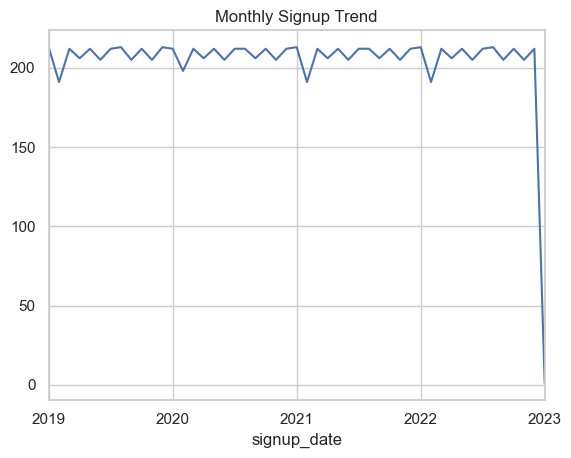

In [14]:

df['signup_date'].value_counts().resample('M').sum().plot()
plt.title("Monthly Signup Trend")
plt.show()


## 🧩 Step 15: Multicollinearity

In [15]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[numerical_cols].dropna()
X = add_constant(X)
pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    "Feature": X.columns
})


,VIF,Feature
0,30.064512,const
1,1.000246,tenure_months
2,1.000724,monthly_fee
3,1.000265,auto_renew
4,1.000214,num_logins_last_30d
5,1.000205,support_tickets
6,1.000196,feature_usage_score
7,1.000516,discount_used


## 🔁 Step 16: Interaction Effects

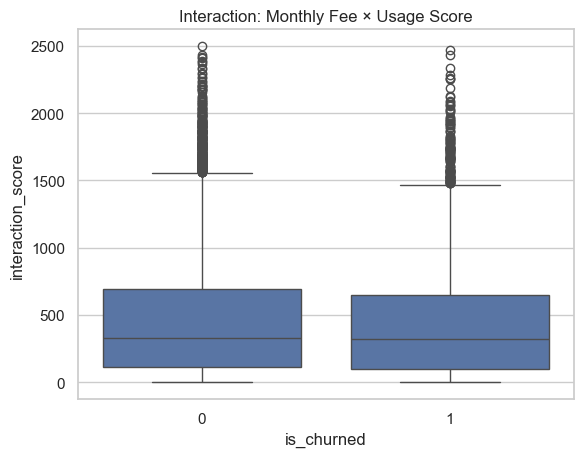

In [16]:

df['interaction_score'] = df['monthly_fee'] * df['feature_usage_score']
sns.boxplot(x='is_churned', y='interaction_score', data=df)
plt.title("Interaction: Monthly Fee × Usage Score")
plt.show()


## 🧯 Step 17: Data Leakage Check

In [17]:

df.corr(numeric_only=True)['is_churned'].sort_values(ascending=False)


is_churned             1.000000
discount_used          0.010553
auto_renew             0.007413
tenure_months          0.002519
support_tickets        0.000625
num_logins_last_30d   -0.002763
feature_usage_score   -0.005898
interaction_score     -0.018359
monthly_fee           -0.020802
Name: is_churned, dtype: float64

## 🛠️ Step 18: Feature Engineering Hints

In [18]:

df['tenure_weeks'] = df['tenure_months'] * 4
df['logins_per_month'] = df['num_logins_last_30d'] / (df['tenure_months'] + 1)
df[['tenure_weeks', 'logins_per_month']].describe()


,tenure_weeks,logins_per_month
count,10000.000000,10000.000000
mean,157.932800,0.343993
std,56.263082,0.179164
min,60.000000,0.033898
25%,108.000000,0.215686
50%,156.000000,0.297872
75%,208.000000,0.425000
max,256.000000,1.529412


## 🔍 Step 19: Clustering Patterns

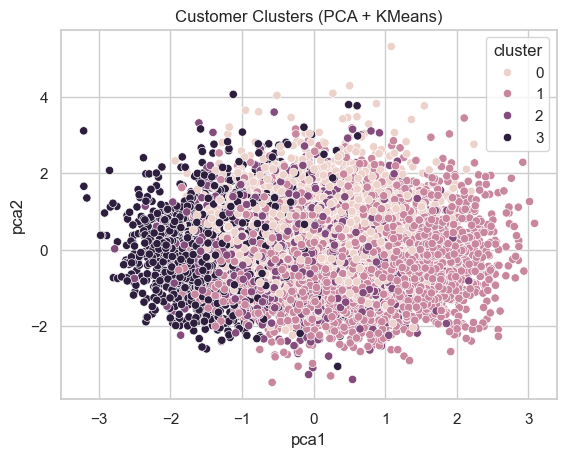

In [19]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaled = StandardScaler().fit_transform(df[numerical_cols])
pca = PCA(n_components=2).fit_transform(scaled)
df['pca1'], df['pca2'] = pca[:, 0], pca[:, 1]
df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(scaled)

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster')
plt.title("Customer Clusters (PCA + KMeans)")
plt.show()


## 🤖 Step 20: AutoEDA Tools

In [20]:

# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Churn AutoEDA Report", explorative=True)
profile.to_file("churn_autoeda_report.html")


/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:   8%|▊         | 2/26 [00:00<00:01, 14.74it/s, Describe variable: support_tickets]/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/describe_date_pandas.py:57: UserWarning: Discarding nonzero nanoseconds in conversion.
  "min": pd.Timestamp.to_pydatetime(series.min()),
/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/describe_date_pandas.py:58: UserWarning: Discarding nonzero nanoseconds in conversion.
  "max": pd.Timestamp.to_pydatetime(series.max()),
Summarize dataset:  82%|████████▏ | 23/28 [00:00<00:00, 18.52it/s, Calculate auto correlation]/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 3 0 ... 3 9 3]' has dtype incompatible with int32, please e

## 📐 Step 21: Statistical EDA

In [21]:

from scipy.stats import ttest_ind, chi2_contingency

# T-Test on monthly_fee
t_stat, p_val = ttest_ind(df[df['is_churned'] == 0]['monthly_fee'],
                          df[df['is_churned'] == 1]['monthly_fee'])
print(f"T-Test on Monthly Fee: t={t_stat:.2f}, p={p_val:.3f}")

# Chi-square on subscription type
cont = pd.crosstab(df['subscription_type'], df['is_churned'])
chi2, p, dof, _ = chi2_contingency(cont)
print(f"Chi-Square on Subscription Type: chi2={chi2:.2f}, p={p:.3f}")


T-Test on Monthly Fee: t=2.08, p=0.038
Chi-Square on Subscription Type: chi2=0.35, p=0.838
